In [1]:
import os
import pandas as pd
import json
import numpy as np
import pickle
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer
from datasets import load_from_disk, load_metric, Dataset, load_dataset

In [2]:
from tsne_visual import visualize_layerwise_embeddings

In [3]:
print(os.getcwd())

/zhome/94/5/127021/speciale/master_project/src/visualization


In [ ]:
# load
#datadir = '/work3/s174498/sst2_dataset/'

#test_dataset = load_from_disk(datadir + 'test_dataset')

In [4]:
with open('/work3/s174498/roberta_files/output_roberta_base.pickle', 'rb') as handle:
    output_pretrained = pickle.load(handle)


/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/zhome/94/5/127021/miniconda3/envs/roberta_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


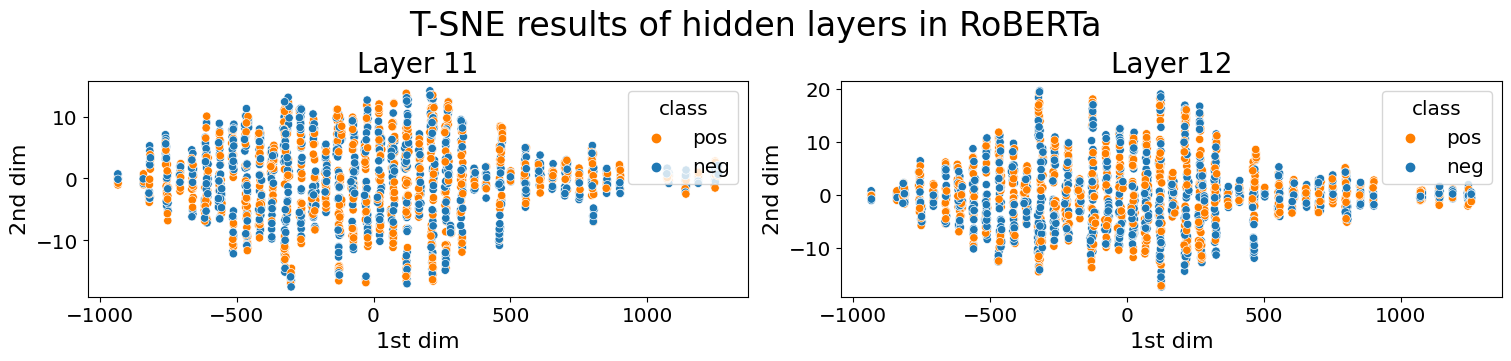

In [5]:
hidden_states = output_pretrained.predictions[1][1:]
labels = output_pretrained.label_ids
title = 'pretrained_results'
layers_to_visualize = [10,11]
perplexity = 10
init = 'pca'
visualize_layerwise_embeddings(hidden_states,labels,title,layers_to_visualize, perplexity, init, save = False)